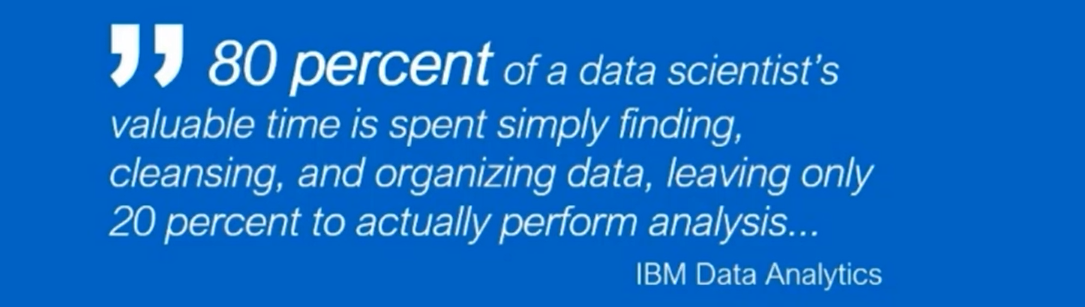

## Topics
* Importing Libraries
* Importing dataset
* Missing Values
* Encoding Categorical Data
    * Encoding the Independent Variable
    *  Encoding the dependent Variable
* Splitting the dataset into the Training set and Test set
* Feature Scaling


### Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df = pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [6]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

### Missing Values

In [7]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

#### Solution1 : Dropna

In [9]:
df_dropna = df.copy()
print("Before : ", df_dropna.shape)

df_dropna.dropna(inplace=True)

print("After : ", df_dropna.shape)

# for we have many records afew records na

Before :  (10, 4)
After :  (8, 4)


#### Solution2 : Use Fillna

In [10]:
df_fillna = df.copy()
df_fillna

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [11]:
df_fillna.fillna(df_fillna.mean(), inplace=True)
print(df_fillna.isnull().sum())
df_fillna

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


<ipython-input-11-688c478d64ae>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fillna.fillna(df_fillna.mean(), inplace=True)


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


#### Solution3 : Use Scikit-learn

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') # strategy : median, most_frequent, constant
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])
#imputer.fit_transform(x[:, 1:3])

In [13]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 61000.0]
 ['France' 35.0 58000.0]
 ['Spain' 38.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### Encoding Categorical Data

#### One Hot Encoding for Independent Variable

##### Solution1 : sklearn OneHotEncoder

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [16]:
x = pd.DataFrame(ct.fit_transform(x))
x

,0,1,2,3,4
0,1.0,0.0,0.0,44.0,72000.0
1,0.0,0.0,1.0,27.0,48000.0
2,0.0,1.0,0.0,30.0,54000.0
3,0.0,0.0,1.0,38.0,61000.0
4,0.0,1.0,0.0,40.0,61000.0
5,1.0,0.0,0.0,35.0,58000.0
6,0.0,0.0,1.0,38.0,52000.0
7,1.0,0.0,0.0,48.0,79000.0
8,0.0,1.0,0.0,50.0,83000.0
9,1.0,0.0,0.0,37.0,67000.0


##### Solution2 : get_dummies Pandas

In [17]:
df = pd.get_dummies(df)

In [18]:
df

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,1,0,0,1,0
1,27.0,48000.0,0,0,1,0,1
2,30.0,54000.0,0,1,0,1,0
3,38.0,61000.0,0,0,1,1,0
4,40.0,NaN,0,1,0,0,1
5,35.0,58000.0,1,0,0,0,1
6,NaN,52000.0,0,0,1,1,0
7,48.0,79000.0,1,0,0,0,1
8,50.0,83000.0,0,1,0,1,0
9,37.0,67000.0,1,0,0,0,1


#### Encoding the dependent variable

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Splitting the dataset into the train test

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [21]:
x_train

,0,1,2,3,4
5,1.0,0.0,0.0,35.0,58000.0
6,0.0,0.0,1.0,38.0,52000.0
3,0.0,0.0,1.0,38.0,61000.0
1,0.0,0.0,1.0,27.0,48000.0
0,1.0,0.0,0.0,44.0,72000.0
7,1.0,0.0,0.0,48.0,79000.0
4,0.0,1.0,0.0,40.0,61000.0
9,1.0,0.0,0.0,37.0,67000.0


In [22]:
dct = {
    'x' : [1,2,np.nan],
    'y' : [np.nan,np.nan,1],
    'z' : [1,2,3]
}

In [23]:
dff = pd.DataFrame(dct)
dff

,x,y,z
0,1.0,NaN,1
1,2.0,NaN,2
2,NaN,1.0,3


In [24]:
dff['z'].isna()

0    False
1    False
2    False
Name: z, dtype: bool

### Feature Scaling
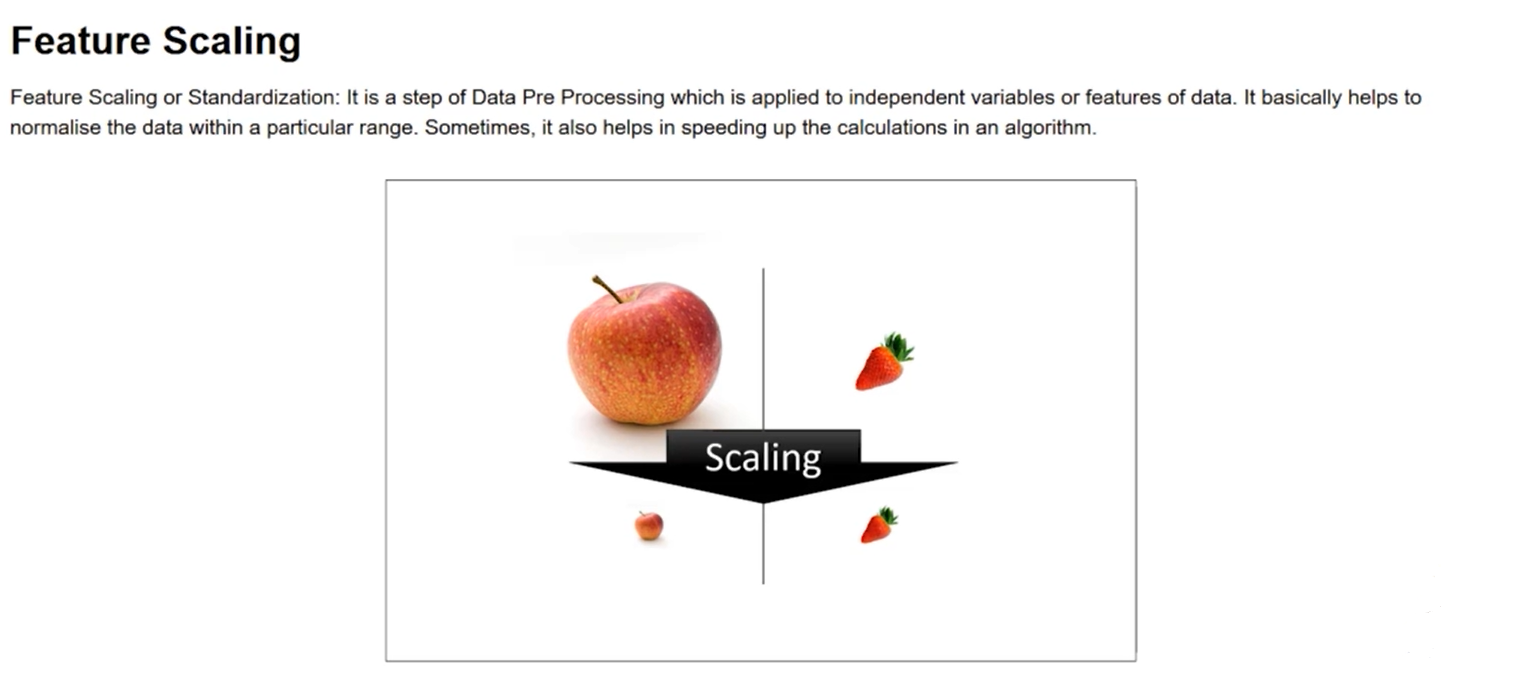
* Min Max Scaler
* Standard Scaler

In [29]:
x_train.iloc[:, 3:5]

,3,4
5,35.0,58000.0
6,38.0,52000.0
3,38.0,61000.0
1,27.0,48000.0
0,44.0,72000.0
7,48.0,79000.0
4,40.0,61000.0
9,37.0,67000.0


#### Min Max Scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train.iloc[:, 3:5] = mm.fit_transform(x_train.iloc[:, 3:5])
x_test.iloc[:, 3:5] = mm.fit_transform(x_test.iloc[:, 3:5])

<ipython-input-30-0a8317122bcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.iloc[:, 3:5] = mm.fit_transform(x_train.iloc[:, 3:5])
<ipython-input-30-0a8317122bcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.iloc[:, 3:5] = mm.fit_transform(x_test.iloc[:, 3:5])


In [31]:
x_train

,0,1,2,3,4
5,1.0,0.0,0.0,0.380952,0.322581
6,0.0,0.0,1.0,0.52381,0.129032
3,0.0,0.0,1.0,0.52381,0.419355
1,0.0,0.0,1.0,0.0,0.0
0,1.0,0.0,0.0,0.809524,0.774194
7,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.619048,0.419355
9,1.0,0.0,0.0,0.47619,0.612903


In [32]:
x_test

,0,1,2,3,4
8,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0


#### Standard Scaler

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [110]:
x_train

array([[ 1.        , -0.37796447, -0.77459667, -0.58108203, -0.44567413],
       [-1.        , -0.37796447,  1.29099445, -0.06456467, -1.07486114],
       [-1.        , -0.37796447,  1.29099445, -0.06456467, -0.13108063],
       [-1.        , -0.37796447,  1.29099445, -1.95846165, -1.49431914],
       [ 1.        , -0.37796447, -0.77459667,  0.96847005,  1.02242888],
       [ 1.        , -0.37796447, -0.77459667,  1.65715986,  1.75648039],
       [-1.        ,  2.64575131, -0.77459667,  0.27978024, -0.13108063],
       [ 1.        , -0.37796447, -0.77459667, -0.23673712,  0.49810638]])